3.a. Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:

  **area, bedrooms, bathrooms, stories, parking**

For this, you need to use the housing dataset. See example on Canvas. Identify the best parameters for your linear regression model, based on the above input variables. In this case, you will have six parameters:

  **U=W5*X5 + W4*X4 + W3*X3 + W2*X2 + W1*X1 + B**

3.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per each training.

3.c Pick the best linear model (the one with the smaller final loss) and visualize it over the input dataset, as we did during the lecture.

In [183]:
import numpy as np 
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

csv_dir = "/content/drive/My Drive/ECGR4106-RealTimeAI/hw1/housing.csv"

housing_df = pd.DataFrame(pd.read_csv(csv_dir)) 
housing_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [184]:
# y = housing_df[['price']].to_numpy(np.float)

# housing_df.drop(['price',
#                  'mainroad',
#                  'guestroom',
#                  'basement',
#                  'hotwaterheating',
#                  'airconditioning',
#                  'hotwaterheating',
#                  'prefarea',
#                  'furnishingstatus'],axis=1,inplace=True)

# x = housing_df.to_numpy(np.float)

In [185]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'] 
Newtrain = housing_df[vars]
Newtrain.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [186]:
y = Newtrain.pop('price').to_numpy(np.float)
x = Newtrain.to_numpy(np.float)

vars
# print(y)
# print(x)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [187]:
import torch

def model_house(x, w, b):
  return np.matmul(x, w) + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()   

def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def dmodel_dw1_house(x, w, b):
  return x[:,0]

def dmodel_dw2_house(x, w, b):
  return x[:,1]

def dmodel_dw3_house(x, w, b):
  return x[:,2]

def dmodel_dw4_house(x, w, b):
  return x[:,3]

def dmodel_dw5_house(x, w, b):
  return x[:,4]

def dmodel_db_house(x, w, b):
  return 1.0

def grad_fn_house(x, y, pred, w, b):
  dloss_dtp = dloss_fn(pred, y)
  dloss_dw1 = dloss_dtp * dmodel_dw1_house(x, w, b)
  dloss_dw2 = dloss_dtp * dmodel_dw2_house(x, w, b)
  dloss_dw3 = dloss_dtp * dmodel_dw3_house(x, w, b)
  dloss_dw4 = dloss_dtp * dmodel_dw4_house(x, w, b)
  dloss_dw5 = dloss_dtp * dmodel_dw5_house(x, w, b)
  dloss_db = dloss_dtp * dmodel_db_house(x, w, b)
  return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_dw3.sum(), dloss_dw4.sum(), dloss_dw5.sum(), dloss_db.sum()])
 
def training_loop_house(n_epochs, learning_rate, params, x, y, print_params=True):
  for epoch in range(1, n_epochs + 1):
    b = params[-1]
    w = params[:-1]

    pred = model_house(x, w, b)
    loss = loss_fn(pred, y)
    grad = grad_fn_house(x, y, pred, w, b)
    
    if epoch in {1, 2, 3, 10, 11, 99, 100, 500, 1000, 2000, 3000, 4000, 5000}:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
      if print_params:
        print('    Params:', params)
        print('    Grad:  ', grad)

    params = params - learning_rate * grad

    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" %(epoch, float(loss)))
  return params

In [188]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scalar = StandardScaler()

max_x = np.amax(x, axis=0)
max_y = np.amax(y)

x_norm = x
y_norm = y

# x_norm[:,0] = scalar.fit_transform(x[:,0])
# x_norm[:,1] = scalar.fit_transform(x[:,1])
# x_norm[:,2] = scalar.fit_transform(x[:,2])
# x_norm[:,3] = scalar.fit_transform(x[:,3])
# x_norm[:,4] = scalar.fit_transform(x[:,4])

x_norm[:,0] = x[:,0]/max_x[0]
x_norm[:,1] = x[:,1]/max_x[1]
x_norm[:,2] = x[:,2]/max_x[2]
x_norm[:,3] = x[:,3]/max_x[3]
x_norm[:,4] = x[:,4]/max_x[4]

norm_x = torch.tensor(x_norm)
norm_y = torch.tensor(y_norm)

In [189]:
params = training_loop_house(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
    x = x_norm,
    y = y_norm
    )

Epoch 1, Loss 26213813982029.046875
    Params: tensor([1., 1., 1., 1., 1., 0.])
    Grad:   tensor([-3299124.6979, -4879673.5516, -3308332.5867, -4643870.0146,
        -2616285.0319, -9533454.8629], dtype=torch.float64)
Epoch 2, Loss 24592923859993.921875
    Params: tensor([32992.2470, 48797.7355, 33084.3259, 46439.7001, 26163.8503, 95334.5486],
       dtype=torch.float64)
    Grad:   tensor([-3189984.8895, -4710746.4464, -3197576.2854, -4486262.8467,
        -2532427.8316, -9198281.4808], dtype=torch.float64)
Epoch 3, Loss 23082078320424.085938
    Params: tensor([ 64892.0959,  95905.2000,  65060.0887,  91302.3286,  51488.1286,
        187317.3634], dtype=torch.float64)
    Grad:   tensor([-3084615.0839, -4547658.7541, -3090646.9988, -4334101.5547,
        -2451457.4830, -8874698.0341], dtype=torch.float64)
Epoch 10, Loss 15019281130801.185547
    Params: tensor([260640.0533, 383017.2417, 260932.3145, 365556.0914, 207581.5588,
        746596.3484], dtype=torch.float64)
    Grad:   t

In [205]:
pred = model_house(x_norm, params[:-1], params[-1])
cost = y_norm

print(pred[0:5])
print(cost[0:5])

tensor([ 7528113.7117, 10770447.7271,  7421900.0143,  7433135.5721,
         6054948.6737], dtype=torch.float64)
[13300000. 12250000. 12250000. 12215000. 11410000.]


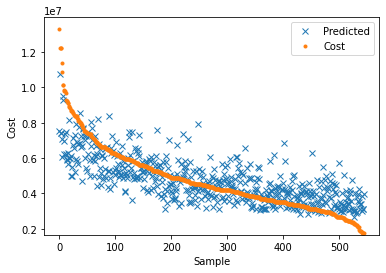

In [207]:
from matplotlib import pyplot as plt

fig = plt.figure(dpi=100)
plt.xlabel("Sample")

plt.ylabel("Cost")

plt.plot(pred.detach().numpy(), 'x', label="Predicted")
plt.plot(y_norm, '.', label="Cost")
plt.legend()